# **Interpolazione polinomiale**

Lo scopo delle tecniche di interpolazione è quello di ricavare, in forma chiusa, una relazione del tipo $y=p(x)$ a partire da alcune osservazioni sperimentali $(x_{1},y_{1}),\dots,(x_{n}, y_{n})$. Strettamente parlando, si parla di *interpolazione* se a partire dai dati viene proposta una funzione $\tilde{p}$ che passa **esattamente** dai dati sperimentali, cioè
</br></br>
$$y_{i}=\tilde{p}(x_{i})\quad\quad\forall i = 1,\dots, n$$
</br>
Si parla invece di _approssimazione ai minimi quadrati_ se l'obiettivo è quello di trovare una funzione $\hat{p}$ che minimizzi lo scarto quadratico
</br></br>
$$\sum_{i=1}^{n}|y_{i}-\hat{p}(x_{i})|^{2}$$
</br>
all'interno di una "classe di possibili funzioni".

Oggi ci focalizzaremo su tre tipologie di interpolazione e approssimazione:

  1. Interpolazione polinomiale di Lagrange, dove $\tilde{p}$ è un polinomio di grado $n-1$
  2. Interpolazione composita (spline), dove $\tilde{p}$ è un polinomio di grado $k$ _a tratti_ (es: spezzata/spline cubica)
  3. Approssimazione polinomiale (minimi quadrati), dove $\hat{p}$ è un polinomio di grado $k<n-1$.


## **Esercizio 1**

Fissato l'intervallo $[0,1]$ e il grado $\text{deg}=3$ del polinomio di interpolazione, rappresentare su un'unica figura tutte le funzioni di base di Lagrange $L_i(x)$ per $i=0,\dots, n$. Utilizzare le funzioni $\texttt{polyfit}$ e $\texttt{polyval}$ della libreria $\texttt{numpy}$.

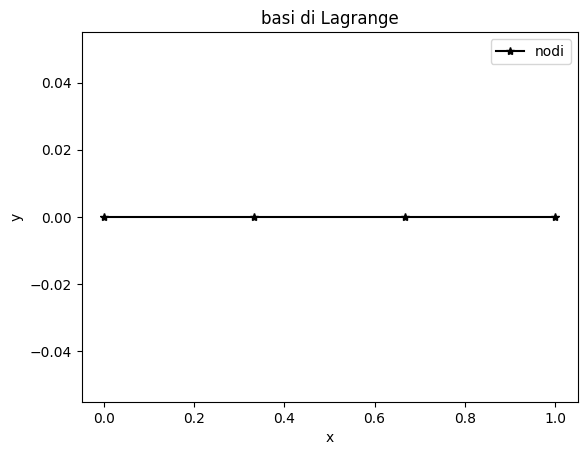

In [ ]:
# Esempio della costruzione di basi
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit, polyval, linspace

# grado del polinomio
deg = 3
# estremi dell'intervallo
a,b = 0,1
# numero dei nodi
n_nodi = deg+1
# nodi nell'intervallo 0 1
x_nodi = linspace(a,b,n_nodi)
# punti dove valutiamo il polinomio per la rappresentazione grafica
xx = linspace(a,b,1000)
plt.plot(x_nodi,np.zeros(n_nodi),'k*-',label = 'nodi')

# costruzione e rappresentazione grafica delle funzioni di basi




plt.title("basi di Lagrange")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **Esercizio 2**
Nella tabella qui sotto riportata vengono elencati i risultati di un
esperimento eseguito per individuare il legame tra lo *sforzo* $\sigma$ e la relativa *deformazione* $\varepsilon$.
</br></br>
\begin{equation}
\begin{matrix}
\text{test}\ & \sigma \ [{\rm MPa}] & \varepsilon [\text{cm}/\text{cm}]\\
    1 & 0.00 & 0.00 \\
    2 & 0.06 & 0.08 \\
    3 & 0.14 & 0.14 \\
    4 & 0.25 & 0.20 \\
    5 & 0.31 & 0.23 \\
    6 & 0.47 & 0.25 \\
    7 & 0.60 & 0.28 \\
    8 & 0.70 & 0.29 \\
  \end{matrix}
\end{equation}
</br>
A partire da questi dati (utilizzando opportune tecniche di interpolazione e approssimazione) si vuole stimare la deformazione $ɛ$ in corrispondenza dei valori di sforzo per cui non si ha a disposizione un dato sperimentale.


<mark>**Esercizio 2.1: rappresentazione grafica dei dati**</mark></br>
Rappresentare i dati graficamente.

In [ ]:
# sigma ed epsilon
sigma = [0.00, 0.06, 0.14, 0.25, 0.31, 0.47, 0.60, 0.70]
epsilon = [0.00, 0.08, 0.14, 0.20, 0.23, 0.25, 0.28, 0.29]

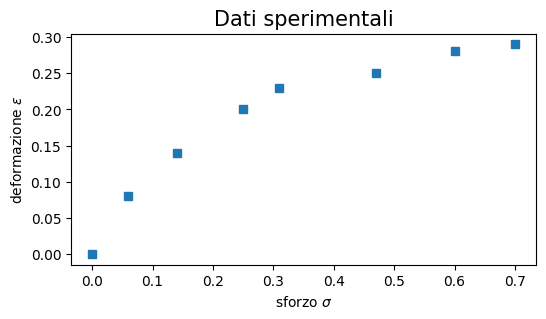

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 3))
plt.plot(sigma, epsilon, 's')
plt.xlabel("sforzo $\sigma$")
plt.ylabel("deformazione $\\varepsilon$")
plt.title("Dati sperimentali", fontsize = 15)
plt.show()

<mark>**Esercizio 2.2: interpolazione polinomiale**</mark></br>
Calcolare l'interpolante polinomiale di Lagrange, quindi confrontarla con i dati sperimentali. A tale scopo, si sfruttino le funzioni $\texttt{polyfit}$ e $\texttt{polyval}$ della libreria $\texttt{numpy}$.

**Nota**: Si rammenti che un polinomio di Lagrange interpolante $n$ dati ha grado $n-1$.

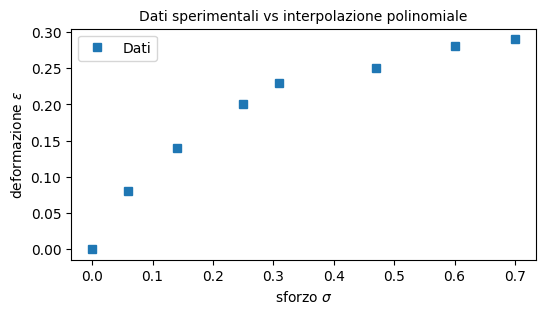

In [ ]:
from numpy import polyfit, polyval, linspace
# interpolazione di lagrange

plt.figure(figsize = (6, 3))
plt.plot(sigma, epsilon, 's', label = 'Dati')
plt.xlabel("sforzo $\sigma$")
plt.ylabel("deformazione $\\varepsilon$")
plt.title("Dati sperimentali vs interpolazione polinomiale", fontsize = 10)
plt.legend()
plt.show()

<mark>**Esercizio 2.3: spline lineare**</mark></br>
Confrontare i dati sperimentali con la loro interpolante lineare a tratti (spline lineare). Si sfrutti la funzione $\texttt{interp}$ della libreria $\texttt{numpy}$.

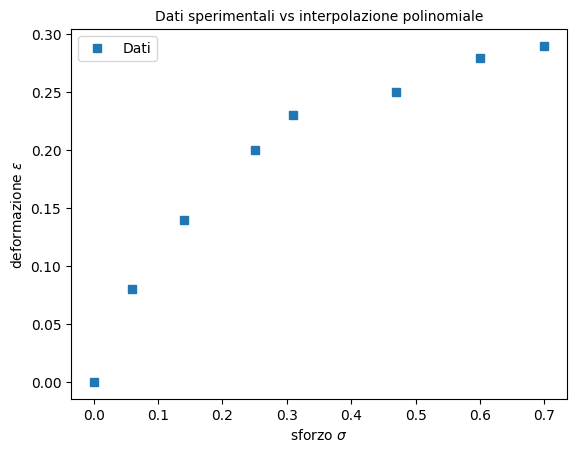

In [ ]:
from numpy import interp
# spline lineari

plt.figure(figsize = (6, 3))
plt.plot(sigma, epsilon, 's', label = 'Dati')
plt.xlabel("sforzo $\sigma$")
plt.ylabel("deformazione $\\varepsilon$")
plt.title("Dati sperimentali vs interpolazione polinomiale", fontsize = 10)
plt.legend()
plt.show()

<mark>**Esercizio 2.4: spline cubica**</mark></br>
Confrontare i dati sperimentali con la loro interpolante cubica a tratti (spline cubica). Si sfrutti la classe $\texttt{CubicSpline}$ presente nel modulo $\texttt{scipy.interpolate}$.

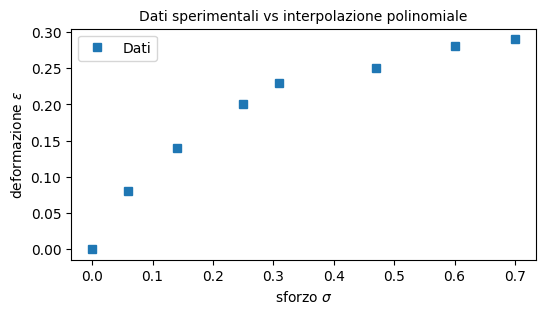

In [ ]:
from scipy.interpolate import CubicSpline
# spline cubiche


plt.figure(figsize = (6, 3))
plt.plot(sigma, epsilon, 's', label = 'Dati')
plt.xlabel("sforzo $\sigma$")
plt.ylabel("deformazione $\\varepsilon$")
plt.title("Dati sperimentali vs interpolazione polinomiale", fontsize = 10)
plt.legend()
plt.show()

<mark>**Esercizio 2.5: minimi quadrati**</mark></br>
Confrontare i dati sperimentali con il corrispondente polinomio di grado 4 ai minimi quadrati. Si sfruttino nuovamente le funzioni $\texttt{polyfit}$ e $\texttt{polyval}$ di $\texttt{numpy}$, facendo attenzione all'argomento $\texttt{deg}$.

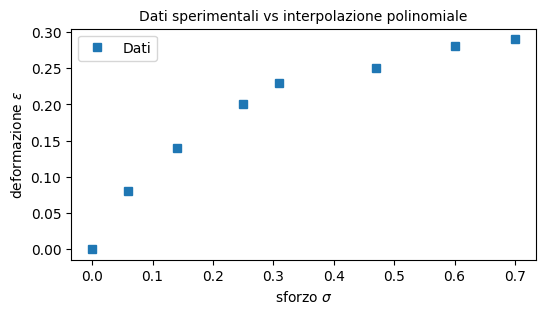

In [ ]:
# Minimi quadrati


plt.figure(figsize = (6, 3))
plt.plot(sigma, epsilon, 's', label = 'Dati')
plt.xlabel("sforzo $\sigma$")
plt.ylabel("deformazione $\\varepsilon$")
plt.title("Dati sperimentali vs interpolazione polinomiale", fontsize = 10)
plt.legend()
plt.show()

<mark>**Esercizio 2.6: confronto globale**</mark></br>

Confrontare, in un unico grafico, i dati sperimentali con tutte le interpolanti e approssimanti

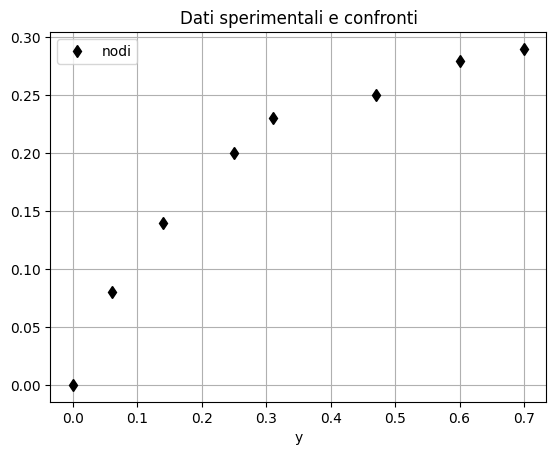

In [ ]:
# Grafico che rappresenta il processo di estrapolazione
import matplotlib.pyplot as plt
# Estremi dell'intervallo dove valutare il polinomio
# a,b =
# punti di valutazione
xx = linspace(a,b,1000)

plt.plot(sigma,epsilon,'kd', label = 'nodi')

# interpolante polinomiale

# spline lineare

# spline cubiche

# minimi quadrati

plt.legend()
plt.title('Dati sperimentali e confronti')
plt.grid()
plt.xlabel('x')
plt.xlabel('y')
plt.show()

<mark>**Esercizio 2.7: confronto approssimazioni in extra points**</mark></br>

Confrontare le approssimazioni proposte dalle tre interpolanti  e dell'approssimazione ai minimi quadrati quando $\sigma=0.4 \text{ MPa}$ e $\sigma=0.75 \text{ MPa}$, si commentino i risultati ottenuti.

In [ ]:
print("\033[1mValore stimato per sigma = 0.4\033[0m")
print("Lagrange\tSpline lineare\tSpline cubica\tMinimi quadrati (grado 4)")
# print("%.4f\t\t%.4f\t\t%.4f\t\t%.4f" % (interpolante, spline_lineare, spline_cubica, minq))

print("\n\033[1mValore stimato per sigma = 0.75\033[0m")
print("Lagrange\tSpline lineare\tSpline cubica\tMinimi quadrati (grado 4)")
# print("%.4f\t\t%.4f\t\t%.4f\t\t%.4f" % (interpolante, spline_lineare, spline_cubica, minq))

Valore stimato per sigma = 0.4
Lagrange	Spline lineare	Spline cubica	Minimi quadrati (grado 4)

Valore stimato per sigma = 0.75
Lagrange	Spline lineare	Spline cubica	Minimi quadrati (grado 4)


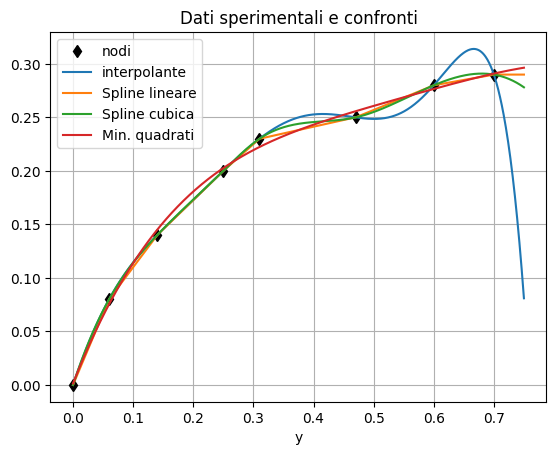

In [ ]:
# Grafico che rappresenta il processo di estrapolazione
import matplotlib.pyplot as plt
# Estremi dell'intervallo dove valutare il polinomio
# a,b =
# punti di valutazione
xx = linspace(a,b,1000)

plt.plot(sigma,epsilon,'kd', label = 'nodi')

# interpolante polinomiale

# spline lineare

# spline cubiche

# minimi quadrati

plt.legend()
plt.title('Dati sperimentali e confronti')
plt.grid()
plt.xlabel('x')
plt.xlabel('y')
plt.show()

## **Esercizio 3: Il fenomeno di Runge**

L'interpolazione polinomiale può anche essere utilizzata per approssimare una data funzione $f: [a,b]\to\mathbb{R}$. In questo caso, si valuta $f$ su di una griglia con $n+1$ nodi, $\{x_{0},\dots,x_{n}\}\subset[a,b]$ e la si approssima con l'interpolante $\tilde{p}=\Pi_{n}f$ passante per i nodi $\{(x_{i}, f(x_{i}))\}_{i=0}^{n}$.
La notazione $\Pi_{n}f$ sta ad enfatizzare che l'interpolante dipende dalla funzione $f$ e dal numero di intervalli della partizione $n$.
</br></br>
La qualità dell'approssimazione può essere indagata a posteriori valutando l'errore globale
</br></br>
$$E_{n}:=\max_{x\in[a,b]}|f(x)-\Pi_{n}f(x)|$$
</br>
sull'intervallo $[a,b]$. Come vedremo, nel caso di interpolazione polinomiale di Lagrange, la numerosità dei nodi non basta a garantire una buona approssimazione: occorre anche posizionare i nodi in modo opportuno!

<mark>**Esercizio 3.1**</mark></br>
Si consideri la funzione
</br></br>
$$f(x)=\frac{1}{1+x^{2}},$$
</br>
sull'intervallo $[a,b]=[-5,5]$. Si approssimi $f$ usando l'interpolazione polinomiale di Lagrange su di una griglia equispaziata con $n=7,9,11$ intervalli. Confrontare graficamente la funzione $f$ con le varie interpolanti. Calcolare inoltre gli errori $E_{n}$: che cosa sta succedendo all'aumentare di $n$?

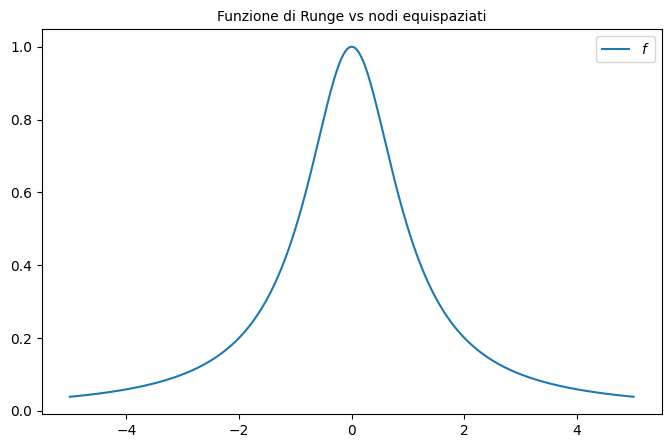

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, pi, arange, linspace, polyfit, polyval

# lambda function per la f
f = lambda x: 1.0/(1+x**2)
# estrmi dell'intervallo
a, b = -5, 5
xplot = linspace(a, b, 1000)


plt.figure(figsize = (8, 5))
plt.plot(xplot, f(xplot), label = '$f$')


plt.title("Funzione di Runge vs nodi equispaziati", fontsize = 10)
plt.legend()
plt.show()


<mark>**Esercizio 3.2**</mark></br>
Si ripeta il punto precedente, utilizzando questa volta i nodi di Chebyshev. Si rammenta che, scelto $n$, sull'intervallo $\hat{I}=[-1,1]$, essi sono dati da
</br></br>
$$\hat{x}_{i}=-\cos\left(\frac{\pi i}{n}\right),$$
</br>
dove $i=0,\dots,n$. I nodi possono essere trasferiti su un generico intervallo $[a,b]$ con la trasformazione
</br></br>
$$x_{i}=\frac{a+b}{2}+\frac{b-a}{2}\hat{x}_{i}.$$
</br>

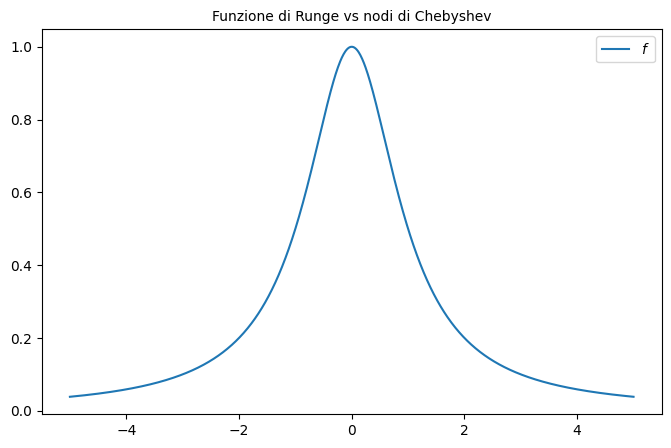

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, pi, arange, linspace, polyfit, polyval
# definire la funzione che restituisca i nodi di Chebychev
#def nodi_Chebyshev(a,b,n):
  ###
  ###
  ###  return x

# rappresentazione grafica dell'esercizio precedente
plt.figure(figsize = (8, 5))
plt.plot(xplot, f(xplot), label = '$f$')


plt.title("Funzione di Runge vs nodi di Chebyshev", fontsize = 10)
plt.legend()
plt.show()


## **Esercizio 4**
Si consideri la funzione $f(x) = xsin(x)$.

  1.  Si disegni  il grafico della funzione $f(x)$ nell'intervallo $[-2,6]$.
  2. Si costruiscano i polinomi interpolanti di Lagrange $\Pi_{n}f$ di grado $n=2,\,4,\,6$ relativi ad una distribuzione di nodi  equispaziati.
  3. Si rappresenti graficamente l'andamento dell'errore
$\varepsilon(x)=|f(x)-\Pi_{n}f(x)|$ e si calcoli la norma infinito:

$$
\parallel \varepsilon(x)\parallel_{\infty}=\max_{x\in[-2,6]}|f(x)-\Pi_{n}f(x)|.
$$

Commentare i risultati.